# Figure 1h

This notebook recreates the visualization shown in figure 1h in the reference article.

> Same t-SNE plot as (C) [t-SNE plot of the integrated scRNA-seq profiles of epithelial cells form 11 reduction mammoplasties.] colored by expression level of a selection of basal, LP, and ML marker genes. Red=high expression, gray=not-detected.

<div style="text-align: center;">
    <img src="images/figure-1h-reference.png" alt="Figure 1h from Reference Article" width="70%">
    <p style="font-size:90%; color:gray; text-align: center;"><em>Figure 1h from Reference Article</em></p>
</div>

## 0. Initializations

In [29]:
# -- imports --
from signals_in_the_noise.preprocessing.gse161529 import GSE161529
from signals_in_the_noise.utilities.visualization import get_figure_axes
import matplotlib.pyplot as plt

In [2]:
# -- dataset --
gse = GSE161529()

2025-07-27 18:01:41,564 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909253_N-PM0092-Total.h5ad as AnnData object.
2025-07-27 18:01:41,663 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909254_N-PM0019-Total.h5ad as AnnData object.
2025-07-27 18:01:41,821 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909255_N-N280-Epi.h5ad as AnnData object.
2025-07-27 18:01:41,879 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909256_N-PM0095-Epi.h5ad as AnnData object.
2025-07-27 18:01:42,030 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909257_N-PM0095-Total.h5ad 

In [3]:
all_real, all_noise = gse.get_combined_epithilial_dataset()

2025-07-27 18:01:47,381 [INFO] signals_in_the_noise.preprocessing.gse161529: Combining datasets...


Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to hig

C:\Users\silly\GitHub\signals-in-the-noise\src\signals_in_the_noise\preprocessing\gse161529.py:399: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=resolution, random_state=self.random_seed)
2025-07-27 18:02:46,072 [INFO] openTSNE.tsne: Precomputed initialization provided. Ignoring initalization-related parameters.
2025-07-27 18:02:46,088 [INFO] openTSNE.tsne: Automatically determined negative gradient method `fft`
2025-07-27 18:02:58,627 [INFO] openTSNE.tsne: Automatically determined negative gradient method `fft`
C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


## 1. "Real" cells

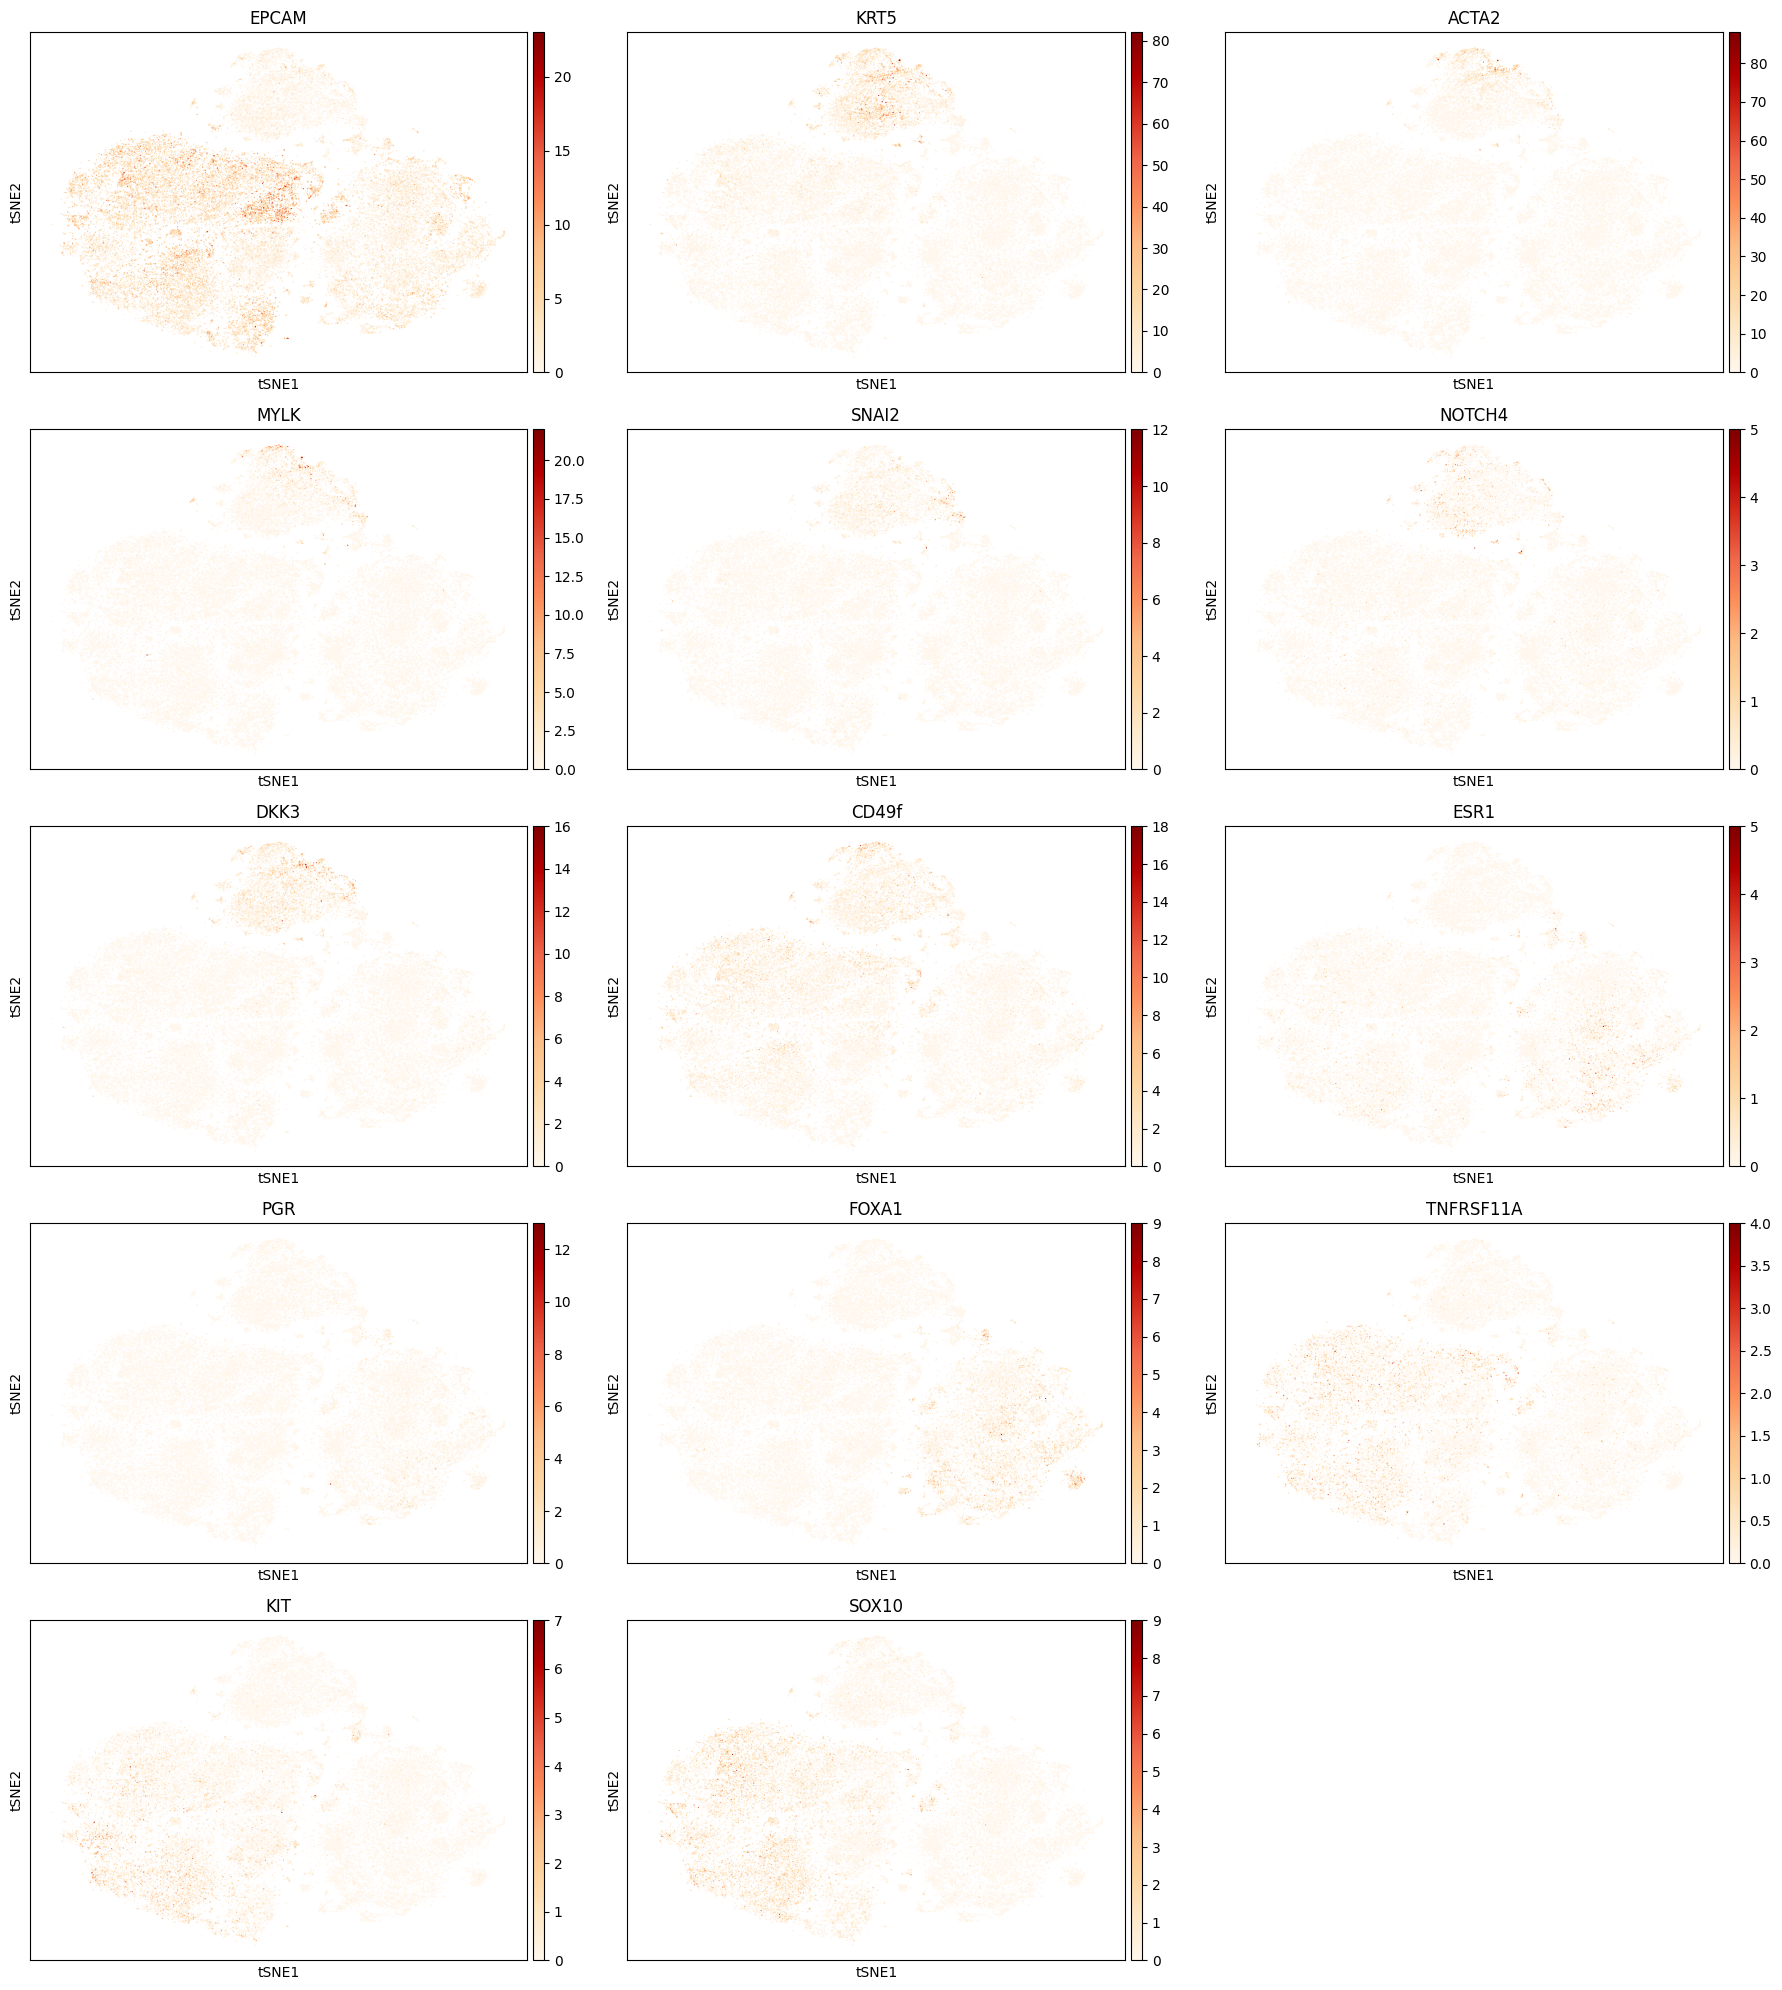

In [32]:
_, axes = get_figure_axes(
    len(gse.EPI_CELL_TYPING_GENES),
    int(len(gse.EPI_CELL_TYPING_GENES)/4),
)
for idx, gene in enumerate(gse.EPI_CELL_TYPING_GENES):
    gse.visualize_tsne(
        all_real,
        color=[gene],
        plot_kwargs={
            'cmap': 'OrRd',
            'title': gene.split('_expr')[0],
            'ax': axes[idx],
            'show': False,
        },
    )

plt.tight_layout()
plt.show()

## 2. "Noise" cells

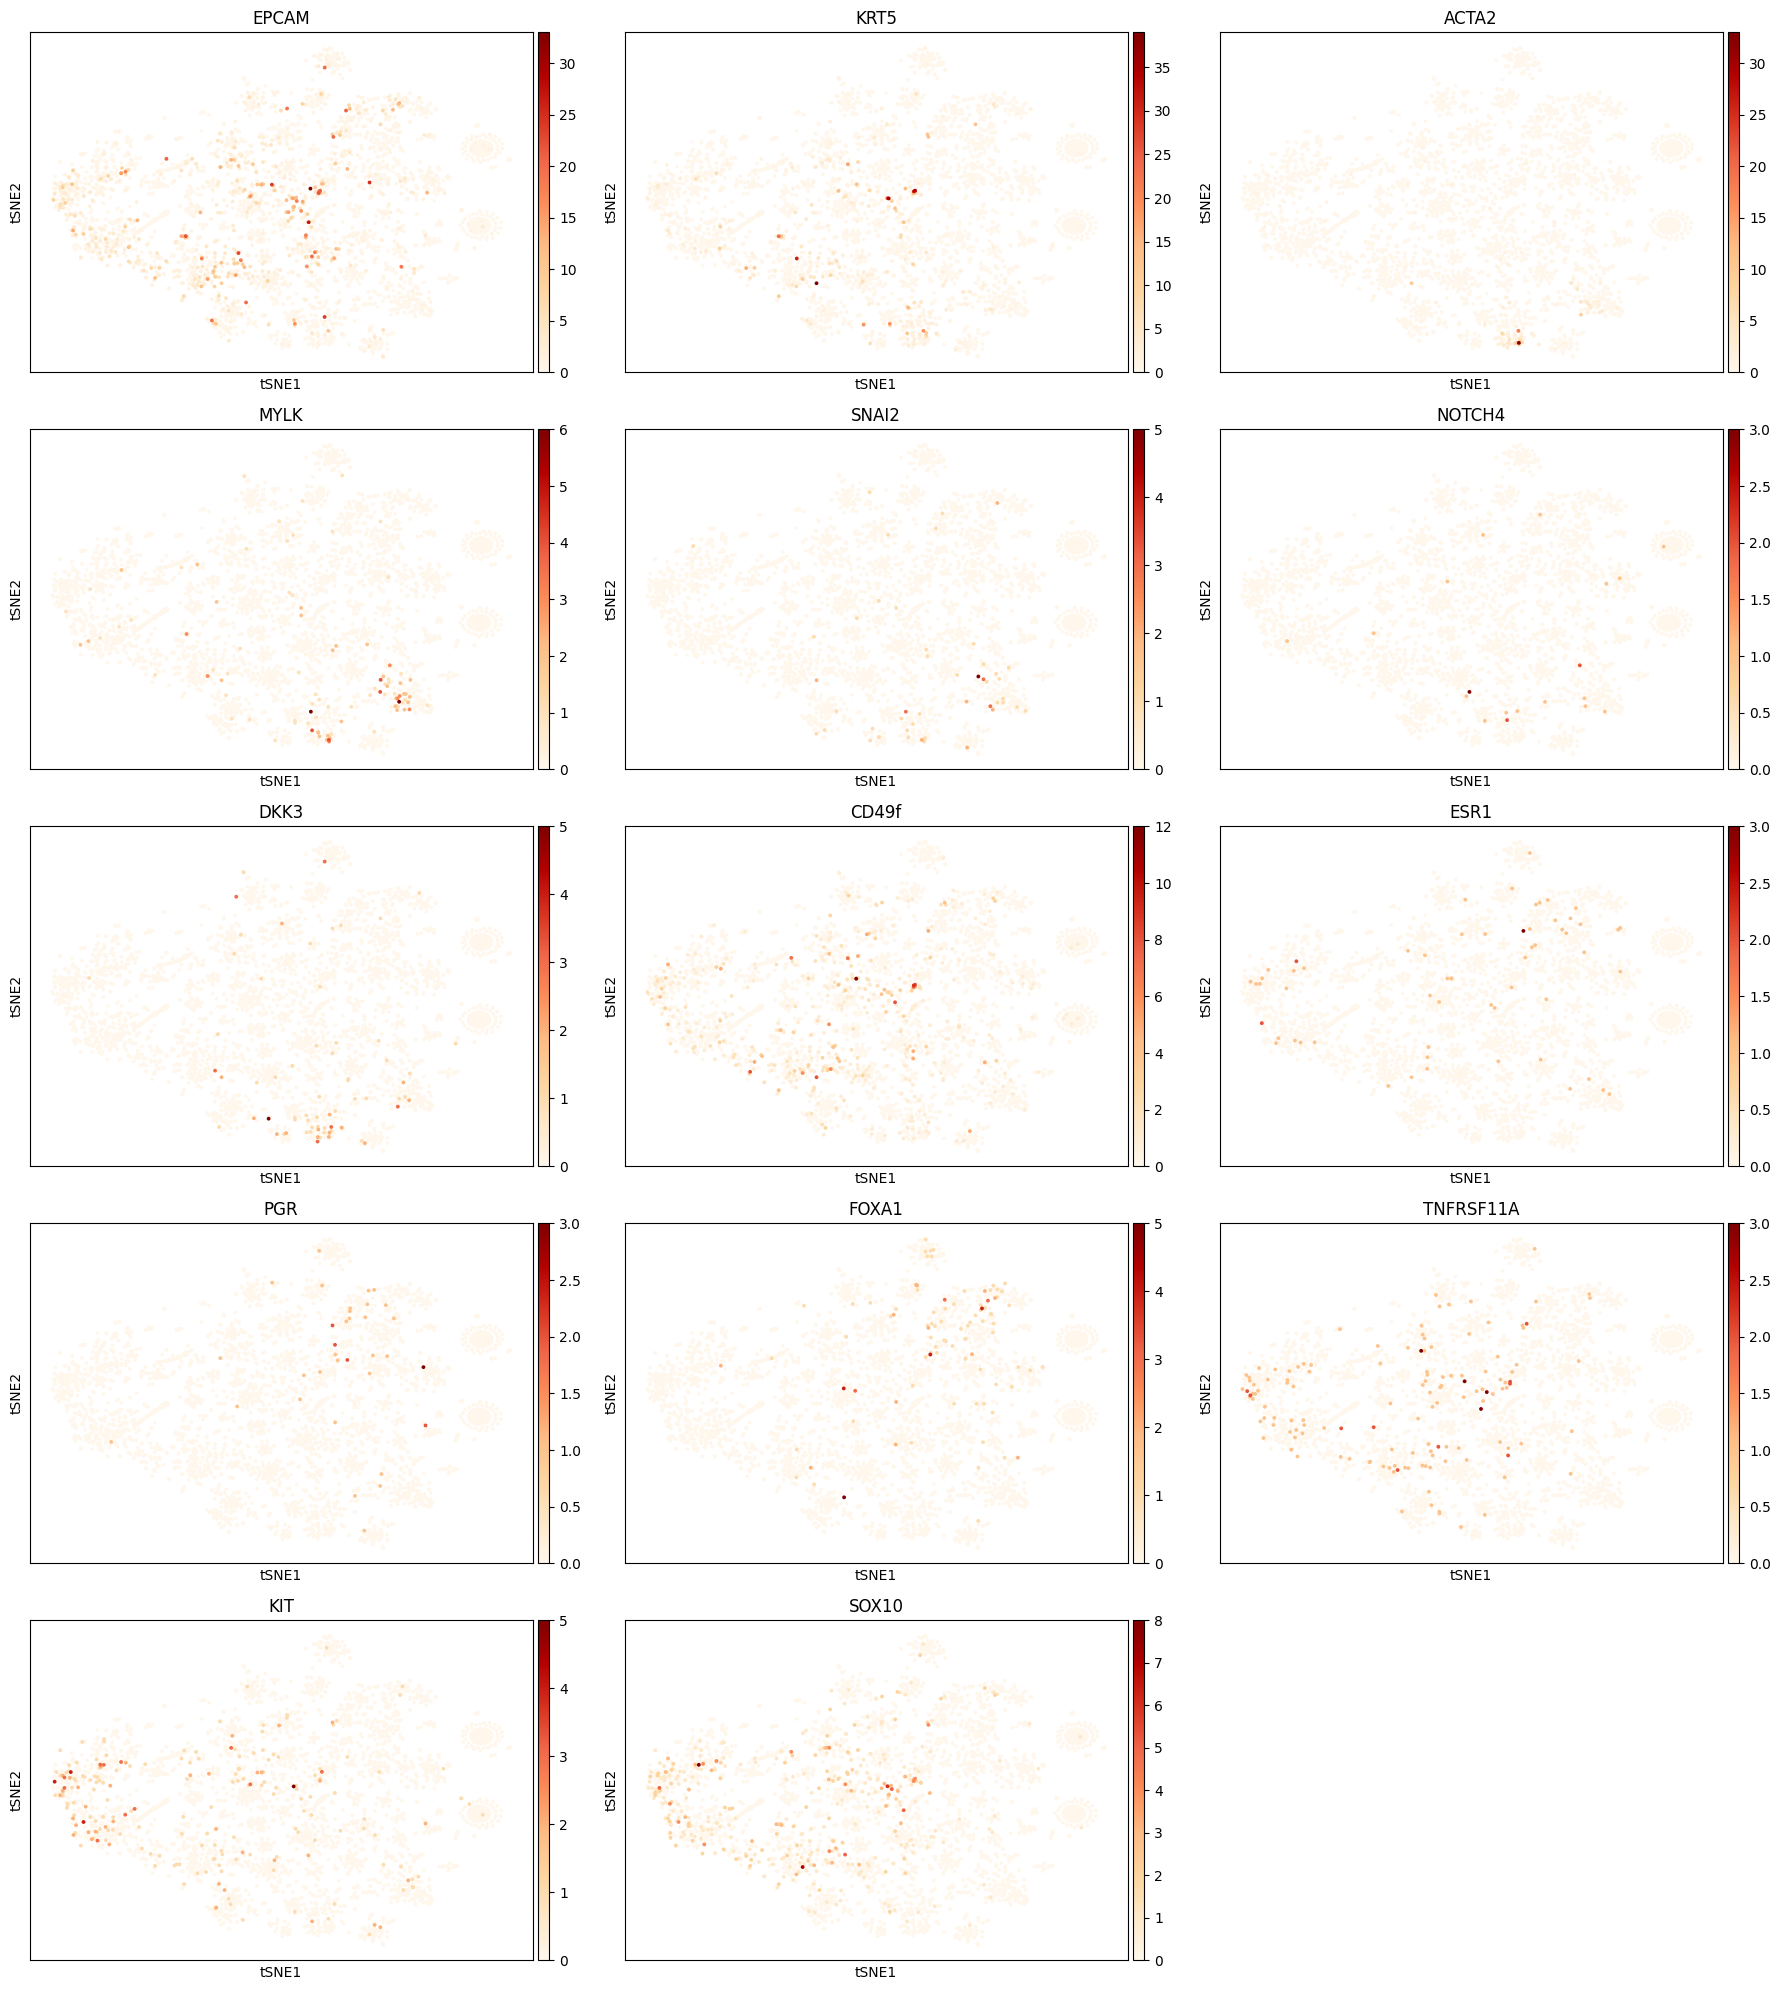

In [33]:
_, axes = get_figure_axes(
    len(gse.EPI_CELL_TYPING_GENES),
    int(len(gse.EPI_CELL_TYPING_GENES)/4),
)
for idx, gene in enumerate(gse.EPI_CELL_TYPING_GENES):
    gse.visualize_tsne(
        all_noise,
        color=[gene],
        plot_kwargs={
            'cmap': 'OrRd',
            'title': gene.split('_expr')[0],
            'ax': axes[idx],
            'show': False,
        },
    )

plt.tight_layout()
plt.show()